### Groovy tutorial calculations and plots in Python

The following cells show how to do the calculations shown in the 'introduction to Groovy scripting' and 'advanced Groovy scripting' tutorials in a Jupyter notebook. The Jupyter notebook does not allow for the setting of parameters in the archive, but facilitates an easier way of plotting the results. The notebook is split into two segments: one for each of the two tutorials.

**Initialization of the Notebook**

In [1]:
import imagej
# One needs to add the path to the Fiji application on the computer
ij = imagej.init('/Applications/Fiji-2.app')
# Python packages
import scyjava as sc
from scyjava.convert import _pandas
import jnius
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from jnius import autoclass
import seaborn as sns

#instantiate required classes to load archives
File = autoclass('java.io.File')
SingleMoleculeArchive = autoclass('de.mpg.biochem.mars.molecule.SingleMoleculeArchive')

In [2]:
# Here the archive is loaded. Add your file path here
yamaFile = File('/Users/nadiahuisjes/Desktop/TestVideo_archive_test.yama')
archive = SingleMoleculeArchive(yamaFile)

**Calculate the dist_y values with and without respect to category**

In [13]:
# Make a list of all dist_y values 
dist_y = []

for UID in archive.getMoleculeUIDs():
    table_y = _pandas.table_to_pandas(archive.get(UID).getDataTable())["y"]
    dist_y.append(max(table_y)-min(table_y))
    
# Alternatively, calculate the dist_y values with respect to category
dist_y_active = []
dist_y_unactive = []

for UID in archive.getMoleculeUIDs():
    table_y = _pandas.table_to_pandas(archive.get(UID).getDataTable())["y"]
    if archive.get(UID).hasTag("Active"):
        dist_y_active.append(max(table_y)-min(table_y))
    else:
        dist_y_unactive.append(max(table_y)-min(table_y))

# Convert the results into a pandas DataFrame
x_active = [1]*len(dist_y_active)
x_unactive = [2]*len(dist_y_unactive)
label_active = ["Active"]*len(dist_y_active)
label_unactive = ["Not Active"]*len(dist_y_unactive)

data_active = {"x":x_active, "dist_y":dist_y_active, "label":label_active}
data_unactive = {"x":x_unactive, "dist_y":dist_y_unactive, "label":label_unactive}

df1 = pd.DataFrame(data_active,columns=["x","dist_y","label"])
df2 = pd.DataFrame(data_unactive,columns=["x","dist_y","label"])

df=df1.append(df2,ignore_index = True)

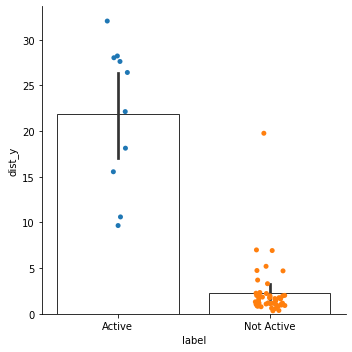

In [48]:
# Plot all dist_y values in a catplot with respect to category
sns.catplot(x='label',y='dist_y',data=df)
sns.barplot(x='label',y='dist_y',data=df,facecolor=(1, 1, 1, 0), errcolor="0.2", edgecolor=".2")

Note that this plot recreates the final plot of the introductory tutorial: including confidence levels based on the calculated variance. Nevertheless, the cell below shows how to calculate variance manually.

**Calculate the variance manually**

In [69]:
list1 = []
list2 = []
list3 = []

mean_dist_y = sum(dist_y)/len(dist_y)
for i in dist_y_active:
    list1.append((i - mean_dist_y)**2)
var = sum(list1)/(len(dist_y)-1)

mean_dist_y_active = sum(dist_y_active)/len(dist_y_active)
for i in dist_y_active:
    list2.append((i - mean_dist_y_active)**2)
var_active = sum(list2)/(len(dist_y_active)-1)

mean_dist_y_unactive = sum(dist_y_unactive)/len(dist_y_unactive)
for i in dist_y_unactive:
    list3.append((i - mean_dist_y_unactive)**2)
var_unactive = sum(list3)/(len(dist_y_unactive)-1)

print(f"The variance values are: \n Overall: {var}\n Active: {var_active} \n Not Active: {var_unactive} ")

The variance values are: 
 Overall: 55.874268147385486
 Active: 62.843641672902095 
 Not Active: 8.886396215731933 


**Calculate the (uncorrected) standard deviation**

In [76]:
stdv = var**0.5
stdv_active = var_active**0.5
stdv_unactive = var_unactive**0.5

print(f"The standard deviations are: \n Overall: {stdv}\n Active: {stdv_active}\n Not Active: {stdv_unactive} ")

The standard deviations are: 
 Overall: 7.474909240076798
 Active: 7.927398165407241
 Not Active: 2.9810059066918893 
